In [1]:
# Following block of code is used to hide/show the warnings in the notebook

from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Importing required Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow.keras as keras
import tensorflow as tf
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

2021-12-07 23:47:43.707031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 23:47:43.707116: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

### Loading CIFAR10 Dataset

In [4]:
cifar = keras.datasets.cifar10.load_data()
train, test = cifar
train_x, train_y = train
test_x, test_y = test

In [5]:
print("Shape of train X : ", np.shape(train_x))
print("Shape of test X : ",np.shape(test_x))
print("Shape of train Y : ",np.shape(train_y))
print("Shape of test Y : ", np.shape(test_y))

Shape of train X :  (50000, 32, 32, 3)
Shape of test X :  (10000, 32, 32, 3)
Shape of train Y :  (50000, 1)
Shape of test Y :  (10000, 1)


In [ ]:
image_des = {0:"airplane", 1:"automobile",2:"bird", 3:"cat", 4:"deer", 5:"dog",
                 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
fig, axes  = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(train_X[i])
    ax.set_title(image_des[train_y[i][0]])
    ax.axis('off')

# Buiding Model

In [9]:
K =  keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [10]:
model =  keras.Sequential(name="cifar")
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for n in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
optimizer  =  keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9)
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer=optimizer)

In [8]:
model.summary()

Model: "cifar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100 

In [9]:
run_index = 1 
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
tfboard_cb =  keras.callbacks.TensorBoard(run_logdir)
callbakcs = [early_stopping_cb, model_checkpoint_cb, tfboard_cb]

2021-12-02 20:07:55.928602: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-02 20:07:55.928653: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-02 20:07:55.929113: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [10]:
model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=1, workers=-1, callbacks=callbakcs)

2021-12-02 20:07:58.756998: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2021-12-02 20:07:58.835119: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-02 20:07:58.856020: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/100
  17/1250 [..............................] - ETA: 18s - loss: 95.7161 - accuracy: 0.0809  

2021-12-02 20:08:00.763449: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-02 20:08:00.763509: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-02 20:08:00.773572: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-02 20:08:00.784190: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-02 20:08:00.797754: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_001/train/plugins/profile/2021_12_02_20_08_00
2021-12-02 20:08:00.802788: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_cifar10_logs/run_001/train/plugins/profile/2021_12_02_20_08_00/ajay-pc.trace.json.gz
2021-12-02 20:08:00.815841: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_001/train/plugins/p

1250/1250 [==============================] - 13s 9ms/step - loss: 3.7686 - accuracy: 0.2022 - val_loss: 2.0112 - val_accuracy: 0.2592
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9497 - accuracy: 0.2850 - val_loss: 1.9027 - val_accuracy: 0.3114
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9017 - accuracy: 0.3038 - val_loss: 1.9057 - val_accuracy: 0.3051
Epoch 4/100
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8834 - accuracy: 0.3111 - val_loss: 1.8646 - val_accuracy: 0.3122
Epoch 5/100
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8607 - accuracy: 0.3155 - val_loss: 1.8485 - val_accuracy: 0.3343
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8563 - accuracy: 0.3185 - val_loss: 1.8693 - val_accuracy: 0.3114
Epoch 7/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.8922 - accuracy: 0.3029 - val_loss: 1.8863 - val_acc

In [11]:
def plot_images_and_labels(test_x, test_y, y_pred):
    image_des = {0:"airplane", 1:"automobile",2:"bird", 3:"cat", 4:"deer", 5:"dog",
                 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
    fig, axes = plt.subplots(4, 4, figsize= (6, 6))
    for i, ax in enumerate(axes.flatten()):
        data_ =  test_x[i]
        color= 'g'
        ax.imshow(data_)
        if y_pred[i] != test_y[i]:
            color ='r'
        ax.set_title(f"{image_des[y_pred[i]]}|{image_des[test_y[i][0]]}", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


def generate_error_reports(model, test_x, test_y):
    image_des = {0:"airplane", 1:"automobile",2:"bird", 3:"cat", 4:"deer", 5:"dog",
             6:"frog", 7:"horse", 8:"ship", 9:"truck"}
    y_pred = model.predict_classes(test_x)
    print("Confusion Maxtrix:")
    print(classification_report(test_y, y_pred))
    _, ax = plt.subplots(figsize= (12, 5))
    sn.heatmap(confusion_matrix(test_y, y_pred), cmap='Blues', annot=True, ax=ax, fmt='.0f',
               xticklabels=image_des.values(), yticklabels=image_des.values())
    ax.set_title("Confusion Matrix")
    plot_images_and_labels(test_x, test_y, y_pred)

Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.39      0.55      0.46      1000
           1       0.40      0.44      0.42      1000
           2       0.26      0.04      0.06      1000
           3       0.19      0.04      0.06      1000
           4       0.29      0.21      0.24      1000
           5       0.34      0.36      0.35      1000
           6       0.35      0.44      0.39      1000
           7       0.25      0.54      0.34      1000
           8       0.40      0.53      0.46      1000
           9       0.37      0.24      0.29      1000

    accuracy                           0.34     10000
   macro avg       0.33      0.34      0.31     10000
weighted avg       0.33      0.34      0.31     10000



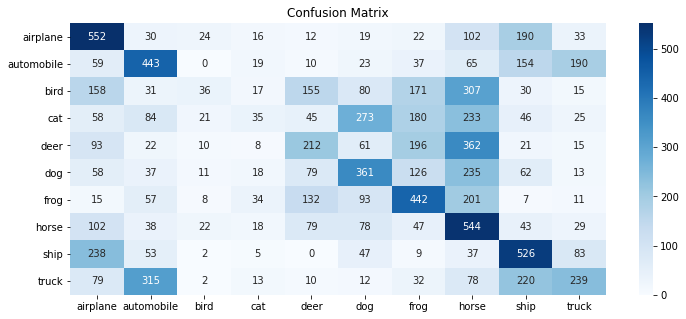

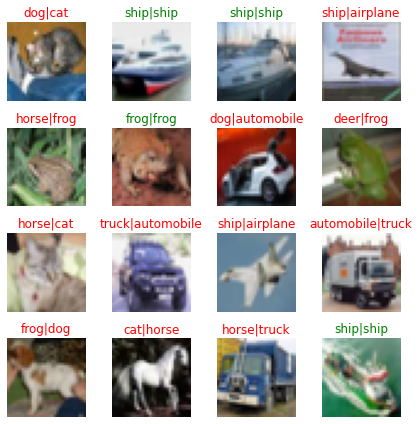

In [67]:
generate_error_reports(model, test_x, test_y)

## Adding BN layers 

In [69]:
model =  keras.Sequential(name="cifar")
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for n in range(20):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
optimizer  =  keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9)
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer=optimizer)

In [70]:
run_index = 2
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
tfboard_cb =  keras.callbacks.TensorBoard(run_logdir)
callbakcs = [early_stopping_cb, model_checkpoint_cb, tfboard_cb]

2021-12-02 20:47:27.738089: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-02 20:47:27.738223: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-02 20:47:27.740226: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [71]:
model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=1, workers=-1, callbacks=callbakcs)

2021-12-02 20:47:36.810340: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


Epoch 1/100
   2/1250 [..............................] - ETA: 3:38 - loss: 3.1816 - accuracy: 0.1250   

2021-12-02 20:47:42.093826: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-02 20:47:42.093860: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


   7/1250 [..............................] - ETA: 2:26 - loss: 2.9527 - accuracy: 0.1161

2021-12-02 20:47:42.472380: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-02 20:47:42.501527: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-02 20:47:42.528849: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_002/train/plugins/profile/2021_12_02_20_47_42
2021-12-02 20:47:42.539565: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_cifar10_logs/run_002/train/plugins/profile/2021_12_02_20_47_42/ajay-pc.trace.json.gz
2021-12-02 20:47:42.563596: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_002/train/plugins/profile/2021_12_02_20_47_42
2021-12-02 20:47:42.563713: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to ./my_cifar10_logs/run_002/train/plugins/profile/2021_12_

1250/1250 [==============================] - 21s 13ms/step - loss: 1.9338 - accuracy: 0.3074 - val_loss: 1.7328 - val_accuracy: 0.3805
Epoch 2/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.7364 - accuracy: 0.3810 - val_loss: 1.7163 - val_accuracy: 0.3896
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6582 - accuracy: 0.4087 - val_loss: 1.5959 - val_accuracy: 0.4388
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6129 - accuracy: 0.4261 - val_loss: 1.5580 - val_accuracy: 0.4494
Epoch 5/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5629 - accuracy: 0.4457 - val_loss: 1.5112 - val_accuracy: 0.4576
Epoch 6/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5262 - accuracy: 0.4600 - val_loss: 1.4888 - val_accuracy: 0.4659
Epoch 7/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4921 - accuracy: 0.4723 - val_loss: 1.4776 - val_

Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      1000
           1       0.57      0.66      0.61      1000
           2       0.38      0.46      0.41      1000
           3       0.34      0.42      0.38      1000
           4       0.42      0.49      0.45      1000
           5       0.45      0.33      0.38      1000
           6       0.63      0.49      0.55      1000
           7       0.67      0.53      0.59      1000
           8       0.69      0.60      0.64      1000
           9       0.56      0.55      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.52     10000
weighted avg       0.53      0.51      0.52     10000



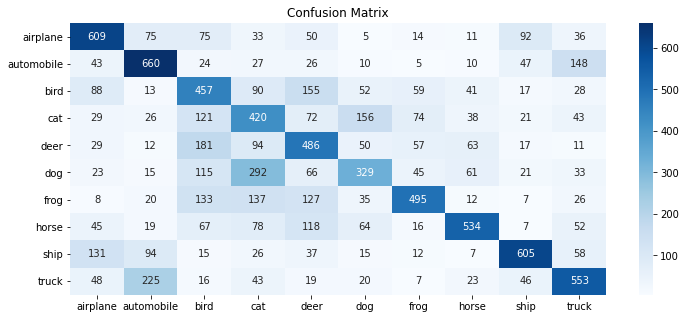

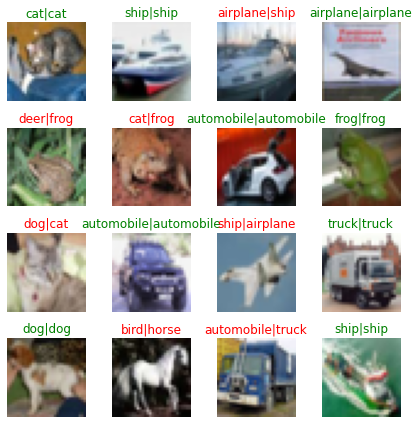

In [72]:
generate_error_reports(model, test_x, test_y)

## Self Normalizing layers

In [12]:
keras.backend.clear_session()

### Standardizing Data

In [13]:
mean = np.mean(train_x)
std =  np.std(train_x)
scaled_train_x = np.divide(train_x-mean, std)
scaled_test_x = np.divide(test_x-mean, std)

In [11]:
model =  keras.Sequential(name="cifar")
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
inializer = keras.initializers.lecun_normal
for n in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer=inializer))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
optimizer  =  keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9)
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer=optimizer)

2021-12-03 10:37:14.910509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-03 10:37:14.910544: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-03 10:37:14.910571: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-12-03 10:37:14.911173: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
run_index = 3
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
tfboard_cb =  keras.callbacks.TensorBoard(run_logdir)
callbakcs = [early_stopping_cb, model_checkpoint_cb, tfboard_cb]

2021-12-03 10:39:16.649215: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-03 10:39:16.649345: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-03 10:39:16.649549: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [17]:
model.fit(scaled_train_x, train_y, validation_split=0.2, epochs=100, callbacks=callbakcs, workers=-1, verbose=1)

2021-12-03 10:39:27.674687: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 491520000 exceeds 10% of free system memory.
2021-12-03 10:39:27.923763: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-03 10:39:27.944740: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/100
  21/1250 [..............................] - ETA: 13s - loss: 2.6251 - accuracy: 0.1503

2021-12-03 10:39:29.855787: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-03 10:39:29.855819: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-03 10:39:29.863642: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-03 10:39:29.872117: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-03 10:39:29.887015: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_003/train/plugins/profile/2021_12_03_10_39_29
2021-12-03 10:39:29.891359: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_cifar10_logs/run_003/train/plugins/profile/2021_12_03_10_39_29/ajay-pc.trace.json.gz
2021-12-03 10:39:29.903891: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_003/train/plugins/p

1245/1250 [============================>.] - ETA: 0s - loss: 1.9986 - accuracy: 0.2849

2021-12-03 10:39:39.159022: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 12s 8ms/step - loss: 1.9976 - accuracy: 0.2853 - val_loss: 1.8649 - val_accuracy: 0.3329
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7887 - accuracy: 0.3616 - val_loss: 1.8007 - val_accuracy: 0.3514
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6985 - accuracy: 0.4004 - val_loss: 1.7159 - val_accuracy: 0.4023
Epoch 4/100
1250/1250 [==============================] - 9s 8ms/step - loss: 1.6400 - accuracy: 0.4192 - val_loss: 1.6439 - val_accuracy: 0.4192
Epoch 5/100
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5860 - accuracy: 0.4399 - val_loss: 1.6446 - val_accuracy: 0.4329
Epoch 6/100
1250/1250 [==============================] - 11s 8ms/step - loss: 1.5506 - accuracy: 0.4557 - val_loss: 1.6151 - val_accuracy: 0.4231
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5129 - accuracy: 0.4689 - val_loss: 1.6092 - val_accuracy: 

2021-12-03 11:32:55.777372: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      1000
           1       0.55      0.71      0.62      1000
           2       0.40      0.31      0.35      1000
           3       0.28      0.21      0.24      1000
           4       0.40      0.43      0.42      1000
           5       0.37      0.53      0.43      1000
           6       0.56      0.56      0.56      1000
           7       0.60      0.56      0.58      1000
           8       0.66      0.62      0.64      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

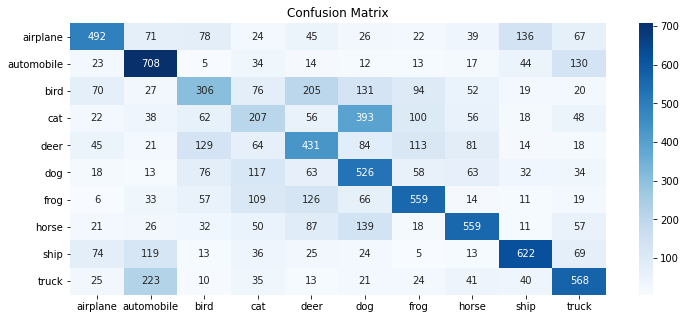

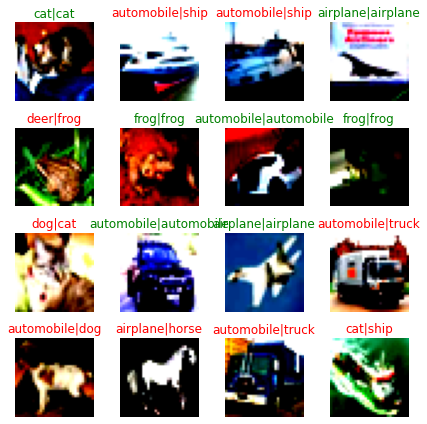

In [18]:
generate_error_reports(model, scaled_test_x, test_y)

## Model with alpha Dropout

In [16]:
model =  keras.Sequential(name="cifar")
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
inializer = keras.initializers.he_normal
for n in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer=inializer))
    model.add(keras.layers.BatchNormalization())
    if n > 15:
        model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
optimizer  =  keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9)
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer=optimizer)


run_index = 4
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
tfboard_cb =  keras.callbacks.TensorBoard(run_logdir)
callbakcs = [early_stopping_cb, model_checkpoint_cb, tfboard_cb]

2021-12-05 15:06:18.555120: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 15:06:18.555150: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-05 15:06:18.555510: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [17]:
model.fit(train_x, train_y, validation_split=0.2, epochs=100, callbacks=callbakcs, workers=-1, verbose=1)

2021-12-05 15:06:24.082207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-05 15:06:24.103938: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/100
   9/1250 [..............................] - ETA: 54s - loss: 2.9650 - accuracy: 0.1146 

2021-12-05 15:06:29.592324: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 15:06:29.592358: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-05 15:06:29.606121: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-05 15:06:29.627325: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-05 15:06:29.653744: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_004/train/plugins/profile/2021_12_05_15_06_29
2021-12-05 15:06:29.664518: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_cifar10_logs/run_004/train/plugins/profile/2021_12_05_15_06_29/ajay-pc.trace.json.gz
2021-12-05 15:06:29.688600: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_004/train/plugins/p

1250/1250 [==============================] - 21s 13ms/step - loss: 2.1455 - accuracy: 0.2475 - val_loss: 2.4761 - val_accuracy: 0.3713
Epoch 2/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8251 - accuracy: 0.3451 - val_loss: 2.4918 - val_accuracy: 0.4100
Epoch 3/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7385 - accuracy: 0.3815 - val_loss: 2.5669 - val_accuracy: 0.4236
Epoch 4/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6787 - accuracy: 0.4053 - val_loss: 2.4448 - val_accuracy: 0.4395
Epoch 5/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6368 - accuracy: 0.4245 - val_loss: 2.3476 - val_accuracy: 0.4633
Epoch 6/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5909 - accuracy: 0.4349 - val_loss: 2.3564 - val_accuracy: 0.4605
Epoch 7/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5558 - accuracy: 0.4491 - val_loss: 2.3329 - val_

Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.54      0.68      0.60      1000
           1       0.64      0.57      0.61      1000
           2       0.46      0.35      0.40      1000
           3       0.29      0.06      0.10      1000
           4       0.56      0.27      0.37      1000
           5       0.39      0.55      0.46      1000
           6       0.47      0.71      0.56      1000
           7       0.56      0.63      0.59      1000
           8       0.57      0.71      0.63      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.49     10000
weighted avg       0.50      0.51      0.49     10000



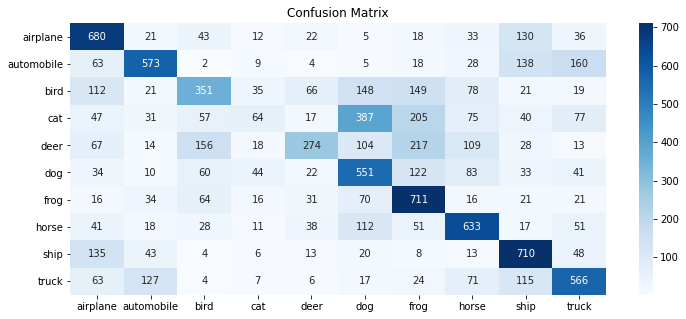

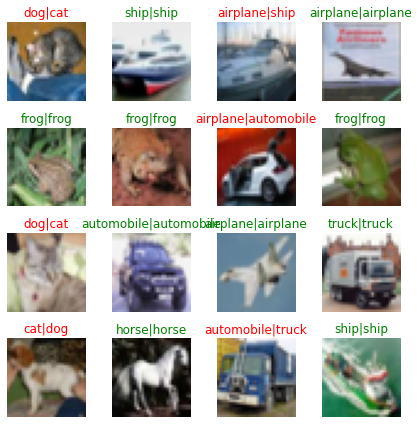

In [18]:
generate_error_reports(model, test_x, test_y)

### MC dropout

In [7]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [8]:
model =  keras.Sequential(name="cifar")
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
inializer = keras.initializers.he_normal
for n in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer=inializer))
    model.add(keras.layers.BatchNormalization())
    if n > 15:
        model.add(MCDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
optimizer  =  keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9)
model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer=optimizer)


run_index = 5
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
tfboard_cb =  keras.callbacks.TensorBoard(run_logdir)
callbakcs = [early_stopping_cb, model_checkpoint_cb, tfboard_cb]

2021-12-08 00:01:42.076574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-08 00:01:42.076612: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-08 00:01:42.076640: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-12-08 00:01:42.076927: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 00:01:42.480386: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.


In [9]:
model.fit(train_x, train_y, validation_split=0.2, epochs=100, callbacks=callbakcs, workers=-1, verbose=1)

2021-12-08 00:01:47.843490: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2021-12-08 00:01:47.940860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-08 00:01:47.961588: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/100
   8/1250 [..............................] - ETA: 1:03 - loss: 3.2902 - accuracy: 0.0391   

2021-12-08 00:01:53.270813: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-08 00:01:53.270850: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-08 00:01:53.287066: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-08 00:01:53.310091: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-08 00:01:53.336416: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_005/train/plugins/profile/2021_12_08_00_01_53
2021-12-08 00:01:53.347470: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_cifar10_logs/run_005/train/plugins/profile/2021_12_08_00_01_53/ajay-pc.trace.json.gz
2021-12-08 00:01:53.372300: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_cifar10_logs/run_005/train/plugins/p

1250/1250 [==============================] - 21s 13ms/step - loss: 2.0815 - accuracy: 0.2629 - val_loss: 1.8212 - val_accuracy: 0.3421
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.8020 - accuracy: 0.3537 - val_loss: 1.7237 - val_accuracy: 0.3870
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.7125 - accuracy: 0.3911 - val_loss: 1.6421 - val_accuracy: 0.4177
Epoch 4/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6662 - accuracy: 0.4110 - val_loss: 1.5902 - val_accuracy: 0.4287
Epoch 5/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6172 - accuracy: 0.4300 - val_loss: 1.5637 - val_accuracy: 0.4443
Epoch 6/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5824 - accuracy: 0.4421 - val_loss: 1.5423 - val_accuracy: 0.4600
Epoch 7/100
1250/1250 [==============================] - 17s 13ms/step - loss: 1.5465 - accuracy: 0.4558 - val_loss: 1.5090 - val_

Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1000
           1       0.60      0.64      0.62      1000
           2       0.43      0.35      0.39      1000
           3       0.34      0.38      0.36      1000
           4       0.43      0.46      0.44      1000
           5       0.50      0.30      0.38      1000
           6       0.53      0.62      0.57      1000
           7       0.56      0.62      0.59      1000
           8       0.55      0.73      0.63      1000
           9       0.61      0.48      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



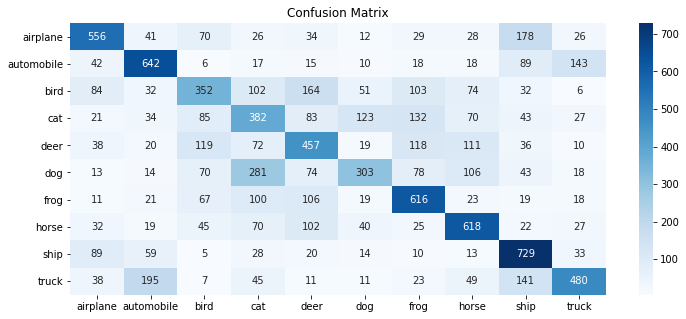

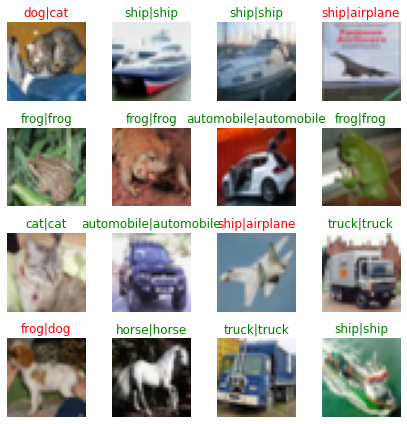

In [12]:
generate_error_reports(model, test_x, test_y)

In [13]:
%load_ext tensorboard
%tensorboard --logdir=my_cifar10_logs --port=6006